## Task A2 – Vaccinations
In the next part of our presentation, we investigate the effect of several preventative measures on the outcome of a deterministic SIR model, starting with vaccination. size equation

# History of vaccinations 
The origin of vaccination as a way of preventing spread of disease dates back as early as the 15th century where there are records of people attempting to prevent illness by exposing healthy people to a disease called smallpox – a method known as variolation. This method captures the general idea of vaccination quite well as a way to prepare the immune system to better fight off a more harmful disease when necessary. 

However, the major breakthroughs in the history of immunisation comes slightly later on the late 1700s where Benjamin Jesty discovers that infection with cowpox – a virus that mainly affects cattle which can spread to humans – could protect against smallpox. Then in May 1796, English physician Edward Jenner adds to this discovery by inoculating James Phipps with matter collected from a cowpox sore on the hand of a milkmaid. Two months later, Jenner inoculates Phipps with matter from a human smallpox sore to test his resistance and Phipps remained in perfect health. Thus, Phipps became the first person in history to be vaccinated against smallpox and following this, the term “vaccine” is coined after the Latin for cow – vacca.
 
In the centuries to come, many other vaccines were created for various diseases such as rabies in the late 1800s, influenza in 1945 after demand for such a vaccine spiked due to the Spanish Flu pandemic in 1918 and polio in the 1950s. The combined efforts of all of these vaccines have surely saved millions or even billions of lives throughout the last 300 years or so and the most recent example of an impactful vaccine would be the COVID-19 vaccine which was created in December 2020. The impressive thing to note about this vaccination is the speed at which it was produced as it took less than a year to develop after the first case of COVID-19. This corresponds to a rapid improvement in vaccine technology following the usage of mRNA technology. This suggests that the future of vaccines is bright and that new vaccines for various other diseases may be discovered shortly. 



# Science of vaccinations 
In order to understand how vaccines act to prevent the spread of disease, we must first cover how a person gets an illness in the first place.  Illness occurs in a person when they are exposed to a pathogen which is a disease-causing organism.  Pathogens are made up of many different subparts and the most important one to us is the subpart called an antigen which triggers the formation of antibodies once a person has been exposed to a pathogen. Antibodies form an integral part of our defence against disease as they attack and destroy specific pathogens depending on the antigen in that pathogen.  When the human body is first exposed to a pathogen, it takes time for the antigen-specific antibodies to be produced and in the meantime, the person falls ill. 

Crucially, once the body has produces antibodies in its response to a pathogen, it also creates antibody-producing memory cells which stay alive even after all of the pathogens have been destroyed. Therefore, if the body is exposed to the same pathogen in the future, it can produce the specific antibodies require much faster, protecting against disease.
 
Vaccines contain weakened or inactive antigens that trigger an immune response in the body when given to someone and so trigger the formation of antigen-specific antibodies. Some newer vaccines contain the blueprint for creating these antibodies instead of the antigen itself but either way, antibodies are produced after taking the vaccine. This weakened version will not cause the disease in the person receiving the vaccine, but it will cause the immune system to respond as if the body had been exposed to the disease. Specifically, antigen-specific antibody-producing memory cells are produced so if in the future the person is exposed to the pathogen that the vaccine is protecting against, their immune system will act much quicker. The result is that the pathogens are destroyed much faster and that protects the person with the vaccine from disease but also acts to prevent that person spreading the pathogens to others.


# Our model  
The way that we investigate the effect of vaccination on the spread of a disease is by determining its impact on the outcome of a deterministic SIR model on a relatively small population of 10000 people. The way in which we go about this is by assuming that there is a fixed number of people in the population that are vaccinated against the disease at the start of the outbreak and investigating the size of I+R after 500 days different numbers of people vaccinated This idea of observing the value of I+R after 500 days correlates significantly with the numerical solution of a revised final size equation which takes vaccination into account.  

# Here is a derivation of the final size equation with vaccination included in the model:

We start by looking at the differential equations that determine the values of I and S 
$$\frac{dS}{dt\ }=\ -\beta IS\ ,\ \frac{dI}{dt\ }=\beta IS\ -\ \mu I\ $$ 
We combine these to get 
$$\frac{dI}{dS\ }=-1\ +\ \frac{\mu}{\beta S}\ $$ 
Solving this to get an equation for I, we get 
$$I\ =\ -S\ +\ \frac{\mu}{\beta}\ln\left(S\right)\ +\ C$$ 
Subbing in initial conditions to get C, 
$$C=I\left(0\right)\ +\ S\left(0\right)\ -\frac{\mu}{\beta}\ln\left(S\left(0\right)\right)\ $$ 
So 
$$ I\ =-S\ +\ \frac{\mu}{\beta\ }\ln\left(S\right)\ +\ I\left(0\right)\ +\ S\left(0\right)\ -\frac{\mu}{\beta}\ln\left(S\left(0\right)\right)\ $$  
At outbreak start, I(0) + S(0) = N-v where v is the number of people vaccinated  
$$I\ =\ -S\ +\ \frac{\mu}{\beta}\ln\left(S\right)\ +\ \left(N-v\right)\ -\frac{\mu}{\beta}\ln\left(S\left(0\right)\right)$$ 
At outbreak end, no more infected left so I(\infty\) = 0 and S(\infty\) + R(\infty\) = N-v , to taking the limit at t tends to infinity 
$$0\ =-\left(\left(N-v\right)-R\left(\infty\right)\right)\ +\ \frac{\mu}{\beta}\ln\left(\left(N-v\right)-R\left(\infty\right)\right)\ +\ \left(N-v\right)\ +\ \frac{\mu}{\beta}\ln\left(S\left(0\right)\right)$$  
Rearranging this gives, 
$$ R\left(\infty\right)=\left(N-v\right)\ -S\left(0\right)\exp\left(-\frac{\beta R\left(\infty\right)}{\mu}\right)\ $$  
We will approximate S(0) == N-v, so we end up with 
$$R\left(\infty\right)\ =\left(N-v\right)\ -\ \left(N-v\right)\exp\left(-\frac{\beta R\left(\infty\right)}{\mu}\right)\ $$ 

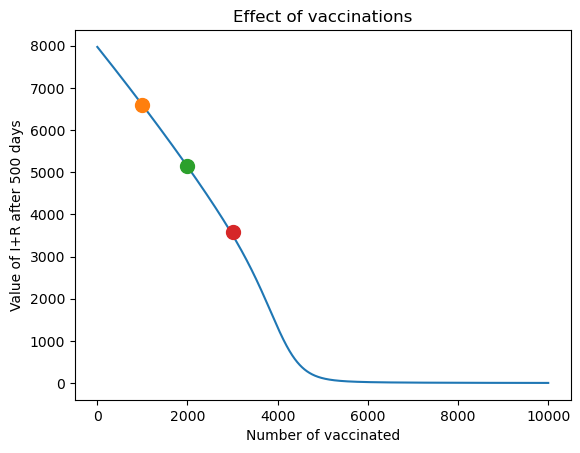

In [1]:
# importing necessary functions from various libraries
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
from sympy import cos,nsolve,Symbol,exp 
# setting up parameter values 
beta = 2*(10**-5) 
mu = 0.1 
# Creating a function to be used in numerically solving the system of DE's in the SIR model 
def SIR(y,t): 
    S,I,R = y 
    N = S + I + R 
    Sdot = -beta * S * I 
    Idot = beta * S * I - mu * I 
    Rdot = mu * I 
    return(Sdot,Idot,Rdot)  
N = 10**4                              ## Setting a population value 
## Creating a function which returns the value of I+R after 500 days for various values of vaccinated people 
def sol(v): 
    tf=500
    Nsteps = 1000 
    t = np.linspace(0,tf,Nsteps+1) 
    S0 = 10**4 - 5 - v
    I0 = 5 
    R0 = 0
    y0 = np.array([S0,I0,R0]) 
    ysol = odeint(SIR,y0,t) 
    S = ysol[:,0] 
    I = ysol[:,1] 
    R = ysol[:,2]  
    iplusr = I[500] + R[500] 
    return iplusr 
 
# Creating a vector to store outputs of above function for v in the range 0 to the whole population
vsol = [] 
for i in range(0,N+1): 
    vsol.append(sol(i))
v=np.linspace(0,N+1,N+1)              # vector to plot the vsol against the value of v

## Numerically finding a solution to the final size equation adjusted to account for vaccinations 
x=Symbol("x") 
F1 = nsolve(x-(N-1000) + (N-1000)*exp(-beta*x/mu),x,10000) 
F2 = nsolve(x-(N-2000) + (N-2000)*exp(-beta*x/mu),x,10000) 
F3 = nsolve(x-(N-3000) + (N-3000)*exp(-beta*x/mu),x,10000) 
## plotting the value of I+R after 500 days against the number of people vaccinated including markers at V=1000,2000 and 3000 respectively
plt.plot(v,vsol) 
plt.xlabel("Number of vaccinated") 
plt.ylabel("Value of I+R after 500 days") 
plt.title("Effect of vaccinations") 
plt.plot(1000,F1,"o",markersize="10")
plt.plot(2000,F2,"o",markersize="10")
plt.plot(3000,F3,"o",markersize="10")
plt.show()



Our investigation yields a nice result as seen above which clearly indicates that as the number of people who are initially vaccinated increases, the size of I+R after 500 days decreases very rapidly to 0. Since the value of I+R after 500 days gives a good indication of the overall size and impact of an outbreak, it can be concluded that increasing the number of people who are vaccinated at outbreak start will drastically reduce the impact of aforementioned outbreak. 
However in reality a model of this sort may be slightly cumbersome. In practice, many vaccines are produced whilst the outbreak is ongoing such as in the case of COVID-19 and more people are vaccinated as time goes on. So, an improvement to our model could be made by allowing the number of vaccinated people to be a function of time much like the other variables in the SIR model. However, an approach such as ours could be more viable if you were to investigate a disease such as the flu, where many people have already built up an immunity of sorts it. In this case, there is closer to a fixed number of vaccinated people at outbreak start so an analysis based on our model may be more accurate.  